Übung 1

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

import math

In [2]:
#read data
beetles = pd.read_csv('beetles.dat', sep="\t")
beetles.head()

,dose,nrBeetles,nrKilled
0,1.6907,59,6
1,1.7242,60,13
2,1.7552,62,18
3,1.7842,56,28
4,1.8113,63,52


Text(0, 0.5, 'Todesrate')

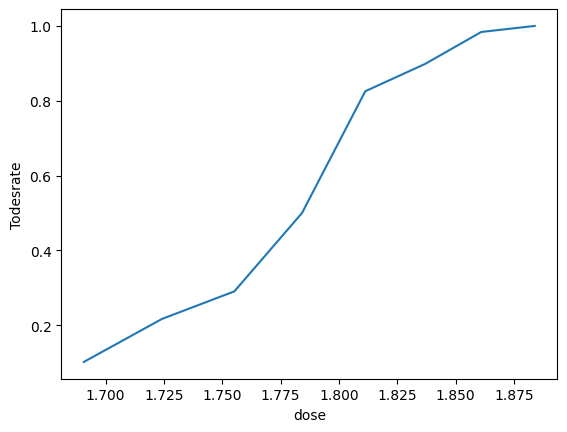

In [3]:
#Aufgabe 1.1
x = beetles["dose"]
y = beetles.nrKilled/beetles.nrBeetles # Anteil der getöteten Käfer
plt.plot(x, y)
plt.xlabel("dose")
plt.ylabel("Todesrate")

# Ideen zu 1.2

In [4]:
# Aufgabe 1.2 Idee

# def sig(x):
#     return 1/(1+np.exp(-x))
# sig(y)

# plt.plot(x, sig(y)) #blau
# plt.plot(x, y) #orange aus Aufgabe 1.1

In [5]:
#Aufgabe 1.2 Entwicklung des lineares Modells

#X = beetles["dose"]
X= [[1.6907],[1.7242],[1.7552],[1.7842],[1.8113],[1.8369],[1.861],[1.8839]]
lin_model_f = LinearRegression(fit_intercept = False) #fit_intercept =false verhindert bias 
lin_model_f.fit(X,y)

#lin_model_f.coef_ #dh 1.6907 sagt mit *0.3418... =[0.57797773] als sterberate voraus (tatsächlich:0.1016949152542373)
#berechnet mit print(1.6907*lin_model_f.coef_)
# und print(beetles.nrKilled[0]/beetles.nrBeetles[0])

#Modellvorhersage:
#lin_model_f.predict([[2]]) 
# gibt array([0.68371412])
#tatsächlich nah dran an 1.8839:
#print(1.8839*lin_model_f.coef_)
# gibt [0.64402452]

lin_model_t = LinearRegression(fit_intercept = True) #fit_intercept mit bias
lin_model_t.fit(X,y)

#EInfluss des bias:
#lin_model_t.coef_ 
#gibt array([5.32493697])
#lin_model_t.intercept_
#gibt bias von -8.947842951441423


LinearRegression()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Todesrate   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.1709
Date:                Tue, 12 Sep 2023   Deviance:                      0.18871
Time:                        15:57:30   Pearson chi2:                    0.168
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4319
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.4591     40.054     -1.509      0.1

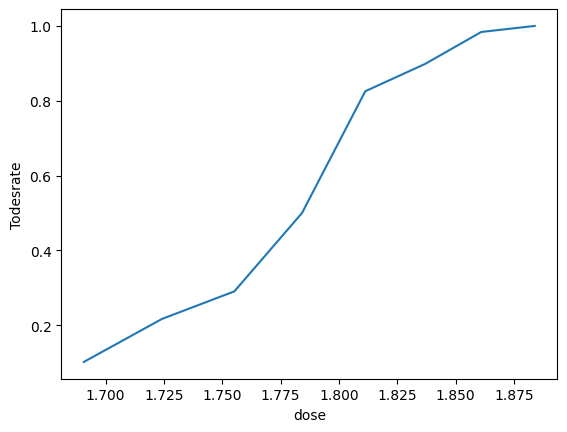

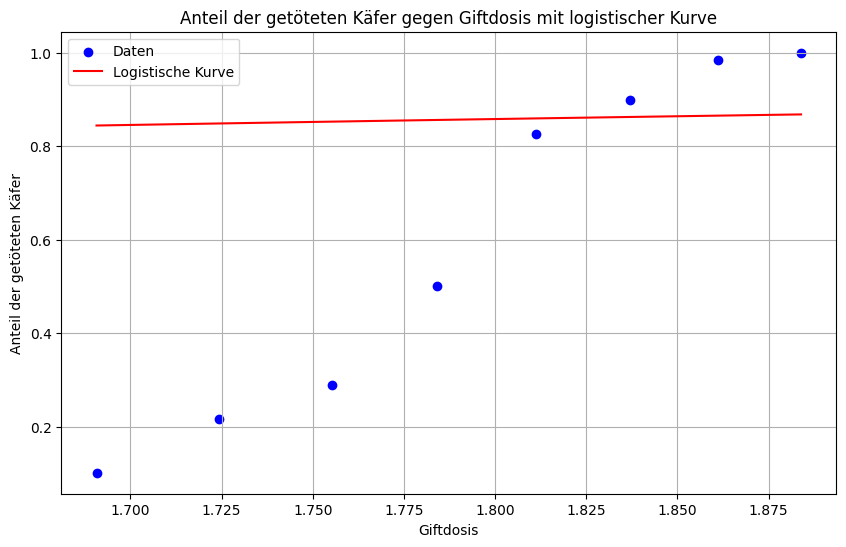

In [6]:
#Aufgabe 1.2 Entwicklung des logistischen Modells

#X = [[1.6907],[1.7242],[1.7552],[1.7842],[1.8113],[1.8369],[1.861],[1.8839]]
#y = [[0.101695],[0.216667],[0.290323],[0.500000],[0.825397],[0.898305],[0.983871],[1.000000]]
#y = beetles.nrKilled/beetles.nrBeetles
beetles['Todesrate']= beetles.nrKilled/beetles.nrBeetles
beetles.head()
log_model = smf.glm(formula='Todesrate ~ dose', data = beetles, family=sm.families.Binomial())
result= log_model.fit()
print(result.summary())

#im Vergleich zu Daten zuvor
#Daten zuvor
x = beetles["dose"]
y = beetles.nrKilled/beetles.nrBeetles
plt.plot(x, y)
plt.xlabel("dose")
plt.ylabel("Todesrate")

#logreg Daten modelliert mit sigmoid Kurve
dose_values =np.linspace(beetles['dose'].min(), beetles['dose'].max(), 100)

def sigmoid(x):
     y = 1 / (1 + np.exp(-1*(x)))
     return (y)


# p0 = [max(beetles["Todesrate"]), np.median(beetles["dose"]),1,min(beetles["Todesrate"])] # this is an mandatory initial guess

# popt, pcov = curve_fit(sigmoid, beetles["dose"], beetles["Todesrate"],p0, method='dogbox')
# # Giftdosenwerte für die Kurve erstellen
# dose_values = np.linspace(beetles['dose'].min(), beetles['dose'].max(), 100)
# z = np.arange(100)
# dose_values = np.concatenate((dose_values, z))
# dose_values = np.split(dose_values,2)
# print(dose_values)

# # Konstanten zu den Dosenwerten hinzufügen
#dose_values = sm.add_constant(dose_values)

# # Vorhersagen für die Kurve erstellen
#curve_predictions = log_model.predict(dose_values) #optimal für lineare regression (kleinster fehler)

# Plot erstellen

plt.figure(figsize=(10, 6))
plt.scatter(beetles['dose'], beetles.nrKilled/beetles.nrBeetles, marker='o', color='blue', label='Daten')
plt.plot(dose_values, sigmoid(dose_values), color='red', label='Logistische Kurve')
#plt.plot(dose_values, curve_predictions, color='red', label='Logistische Kurve')
plt.title('Anteil der getöteten Käfer gegen Giftdosis mit logistischer Kurve')
plt.xlabel('Giftdosis')
plt.ylabel('Anteil der getöteten Käfer')
plt.legend()
plt.grid(True)
plt.show()


# Lösung zu 1.2

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.1709
Date:                Tue, 12 Sep 2023   Deviance:                      0.18871
Time:                        15:57:31   Pearson chi2:                    0.168
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4319
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.4591     40.054     -1.509      0.1

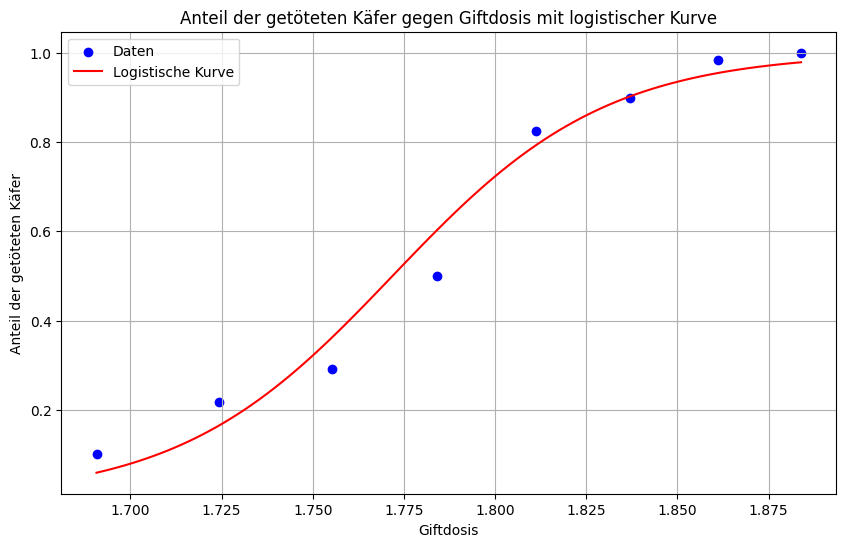

In [7]:
#Aufgabe 1.2 beste Antwort

#generelles lin Modell ist definiert als Y =X*beta + epsilon mit
# Unabhängige Variable (Giftdosis)
X = beetles['dose']

# Abhängige Variable (Todesrate)
y = beetles.nrKilled/beetles.nrBeetles

# Konstanten hinzufügen
X = sm.add_constant(X) #beta0


# Logistisches Regressionsmodell anpassen, logist. Modell nach Bsp 2.10 ist aus Familie der Binomialverteilungen mit b=1
logistic_model = sm.GLM(y, X, family=sm.families.Binomial()).fit() #GLM mit data.endogen, data.exogen, family, fit trainiert Modell, dh insert Daten und berechne betas
print(logistic_model.summary())
# Giftdosenwerte für die Kurve erstellen
dose_values = np.linspace(beetles['dose'].min(), beetles['dose'].max(), 100)

# Konstanten zu den Dosenwerten hinzufügen
dose_values = sm.add_constant(dose_values)

# Vorhersagen für die Kurve erstellen
curve_predictions = logistic_model.predict(dose_values) #optimal für lineare regression (kleinster fehler)

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(beetles['dose'], beetles.nrKilled/beetles.nrBeetles, marker='o', color='blue', label='Daten')
plt.plot(dose_values[:, 1], curve_predictions, color='red', label='Logistische Kurve')
plt.title('Anteil der getöteten Käfer gegen Giftdosis mit logistischer Kurve')
plt.xlabel('Giftdosis')
plt.ylabel('Anteil der getöteten Käfer')
plt.legend()
plt.grid(True)
plt.show()


# 1.3

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.1709
Date:                Tue, 12 Sep 2023   Deviance:                      0.18871
Time:                        15:57:32   Pearson chi2:                    0.168
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4319
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.4591     40.054     -1.509      0.1

c:\Users\canis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The probit link alias is deprecated. Use Probit instead. The probit link alias will be removed after the 0.15.0 release.
  warnings.warn(


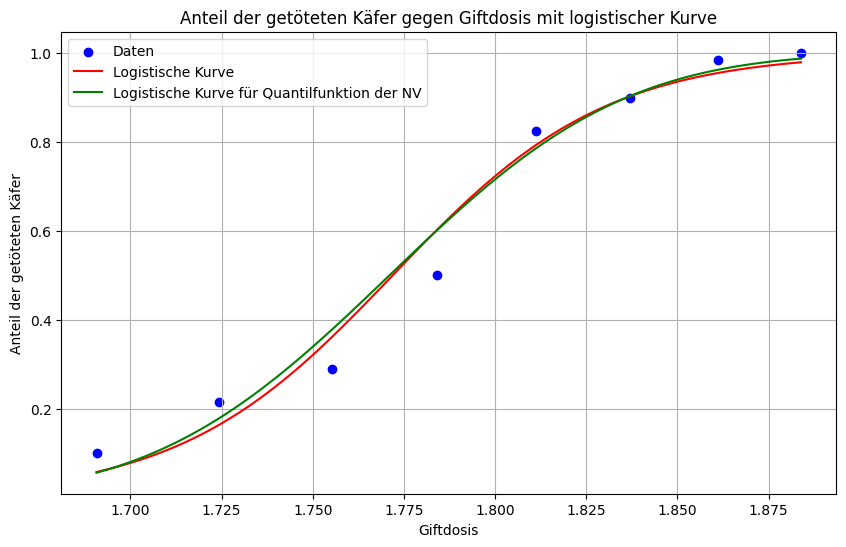

In [8]:
# Unabhängige Variable (Giftdosis)
X = beetles['dose']

# Abhängige Variable (Todesrate)
y = beetles.nrKilled/beetles.nrBeetles

# Konstanten hinzufügen
X = sm.add_constant(X) #beta0


# Logistisches Regressionsmodell anpassen, logist. Modell nach Bsp 2.10 ist aus Familie der Binomialverteilungen mit b=1
logistic_model = sm.GLM(y, X, family=sm.families.Binomial()).fit() #GLM mit data.endogen, data.exogen, family, fit trainiert Modell, dh insert Daten und berechne betas
print(logistic_model.summary())

# Link-Funktion (probit)
link_function = sm.families.links.probit() #probit regression funktioniert wie logistische regression, nur dass statt sigmoid die phi-Funktion verwendet wird

# Logistisches Regressionsmodell mit probit-Linkfunktion anpassen
logistic_model2 = sm.GLM(y, X, family=sm.families.Binomial(link=link_function)).fit()

print(logistic_model2.summary())
# Giftdosenwerte für die Kurve erstellen
dose_values = np.linspace(beetles['dose'].min(), beetles['dose'].max(), 100)

# Konstanten zu den Dosenwerten hinzufügen
dose_values = sm.add_constant(dose_values)

# Vorhersagen für die Kurve erstellen
curve_predictions = logistic_model.predict(dose_values) #optimal für lineare regression (kleinster fehler)
curve_predictions2 = logistic_model2.predict(dose_values) 

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(beetles['dose'], beetles.nrKilled/beetles.nrBeetles, marker='o', color='blue', label='Daten')
plt.plot(dose_values[:, 1], curve_predictions, color='red', label='Logistische Kurve')
plt.plot(dose_values[:, 1], curve_predictions2, color='green', label='Logistische Kurve für Quantilfunktion der NV')
plt.title('Anteil der getöteten Käfer gegen Giftdosis mit logistischer Kurve')
plt.xlabel('Giftdosis')
plt.ylabel('Anteil der getöteten Käfer')
plt.legend()
plt.grid(True)
plt.show()

#im Vergleich beider Modell hat das mit der probit funktion niedrigere p-Werte, also möglicherweise Abhängigkeit zwischen der unahängigen und abhägnigen Variable, aber auch niedrigere Varianz

# 1.4

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2.1709
Date:                Tue, 12 Sep 2023   Deviance:                      0.18871
Time:                        15:57:32   Pearson chi2:                    0.168
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4319
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.4591     40.054     -1.509      0.1

c:\Users\canis\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\genmod\families\links.py:13: FutureWarning: The probit link alias is deprecated. Use Probit instead. The probit link alias will be removed after the 0.15.0 release.
  warnings.warn(


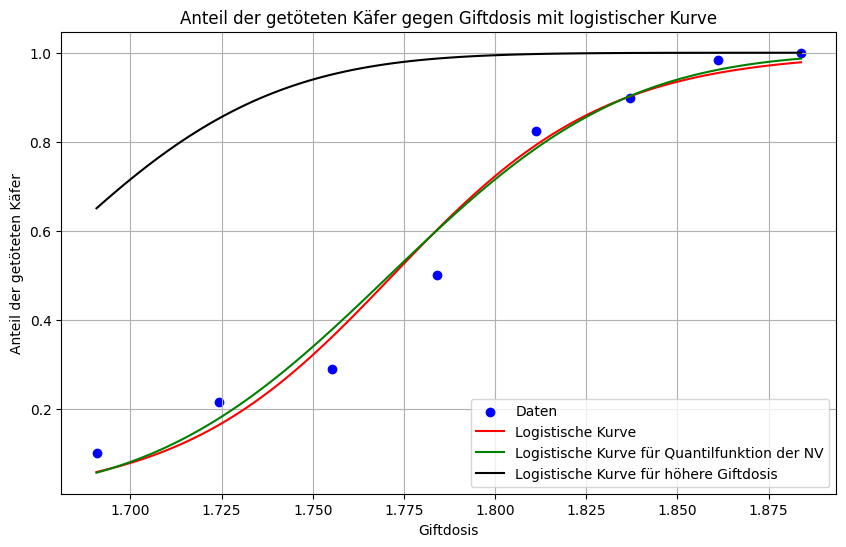

In [9]:
#Idee

# Unabhängige Variable (Giftdosis)
X = beetles['dose']

# Abhängige Variable (Todesrate)
y = beetles.nrKilled/beetles.nrBeetles

# Konstanten hinzufügen
X = sm.add_constant(X) #beta0


# Logistisches Regressionsmodell anpassen, logist. Modell nach Bsp 2.10 ist aus Familie der Binomialverteilungen mit b=1
logistic_model = sm.GLM(y, X, family=sm.families.Binomial()).fit() #GLM mit data.endogen, data.exogen, family, fit trainiert Modell, dh insert Daten und berechne betas
print(logistic_model.summary())

# Link-Funktion (probit)
link_function = sm.families.links.probit()

# Logistisches Regressionsmodell mit probit-Linkfunktion anpassen
logistic_model2 = sm.GLM(y, X, family=sm.families.Binomial(link=link_function)).fit()
print(logistic_model2.summary())

# Giftdosenwerte für die Kurve erstellen
dose_values = np.linspace(beetles['dose'].min(), beetles['dose'].max(), 100)
dose_valuesneu = np.linspace(beetles['dose'].min()+0.1, beetles['dose'].max()+0.1, 100)

# Konstanten zu den Dosenwerten hinzufügen
dose_values = sm.add_constant(dose_values)
dose_valuesneu = sm.add_constant(dose_valuesneu)

# Vorhersagen für die Kurve erstellen
curve_predictions = logistic_model.predict(dose_values) #optimal für lineare regression (kleinster fehler)
curve_predictions2 = logistic_model2.predict(dose_values)
curve_predictions3 = logistic_model2.predict(dose_valuesneu)

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.scatter(beetles['dose'], beetles.nrKilled/beetles.nrBeetles, marker='o', color='blue', label='Daten')
plt.plot(dose_values[:, 1], curve_predictions, color='red', label='Logistische Kurve')
plt.plot(dose_values[:, 1], curve_predictions2, color='green', label='Logistische Kurve für Quantilfunktion der NV')
plt.plot(dose_values[:, 1], curve_predictions3, color='black', label='Logistische Kurve für höhere Giftdosis')
plt.title('Anteil der getöteten Käfer gegen Giftdosis mit logistischer Kurve')
plt.xlabel('Giftdosis')
plt.ylabel('Anteil der getöteten Käfer')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
#1.4 Berechnung der Auswirkung der Erhöhung der Dosis
# Koeffizienten von 'dose' aus dem Logistischen Regressionsmodell (Koeffizient steht für Veränderung der log-Wkt vom Ergebnis, wenn sich Dosis um 1 Einheit erhöht)
coeff_dose = logistic_model2.params['dose'] # Änderung des Koeffizienten

#Erhöhung der Dosis um 0.1 => Koeffizienten mit 0.1 multiplizieren
change_in_log_odds = coeff_dose* 0.1 #change in log odds sind betas sind logarithmiert

# Quotenverhältnis = Maß, wie die Wkt sich ändert, wenn die unabhängige Variable sich um 1 Einheit ändert(>1 => 0.1-Einheit-Veränderung der Dosis erhöht die Sterberate, <1 => verringert Wkt zu sterben)
#exp um Variable zu transformieren von log-Wkt zu Wkt
odds_ratio = np.exp(change_in_log_odds)

#Berechne Veränderungsrate vom Anteil der getöteten Käfer
#(New Share-Old Share)/Old Share 
change_in_share_killed = (odds_ratio - 1) /odds_ratio

print(f"Eine Erhöhung der Dosis um 0.1 erhöht den Anteil der getöten Käfer um {change_in_share_killed:.2%} .")


Eine Erhöhung der Dosis um 0.1 erhöht den Anteil der getöten Käfer um 85.99% .
